<b>Spectral Clustering </b>

In [1]:
from sklearn.datasets import make_circles

from sklearn.neighbors import kneighbors_graph 

from sklearn.cluster import KMeans

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()


The data is generated using the **make_circles** dataset-generator of sklearn.
A total of 500 datapoints is generated.

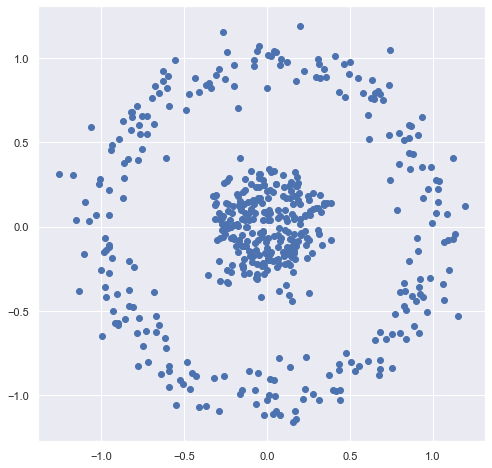

In [2]:
# create the data
X, labels = make_circles(n_samples=500, noise=0.1, factor=.2,random_state=0)
fig,ax = plt.subplots(1,1,figsize=(8,8))
plt.scatter(X[:,0],X[:,1]);

In a first step, we could proceed and use KMeans-clustering and see where we get:

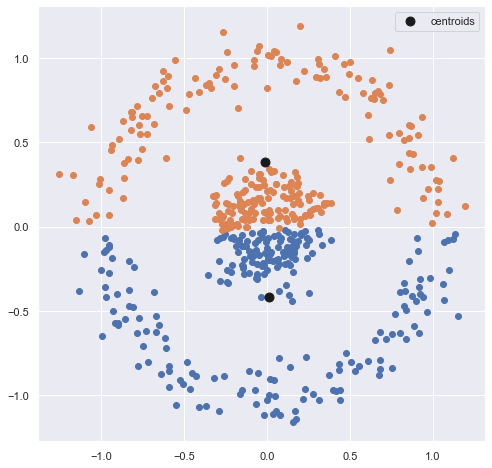

In [3]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_label = kmeans.predict(X)

fix , ax = plt.subplots(1,1,figsize=(8,8))
for i in np.unique(y_label):
    idx = y_label==i
    ax.scatter(X[idx,0],X[idx,1])

#plotting the centroids
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='k',s=80.0,label='centroids')
ax.legend();

The Adjacency matrix is constructed using `kneighbors_graph`

In [4]:
A = kneighbors_graph(X, n_neighbors=5).toarray()
pd.DataFrame(A).head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Creating a simple Laplacian $L$

In [5]:
D = np.diag(A.sum(axis=1))
L = D-A

Determine the eigenvalues and eigenvectors

In [6]:
vals, vecs = np.linalg.eig(L)
vals = np.real(vals)
vecs = np.real(vecs)

In [7]:
vecs_sorted = vecs[:,np.argsort((vals))]
vals_sorted = vals[np.argsort((vals))]

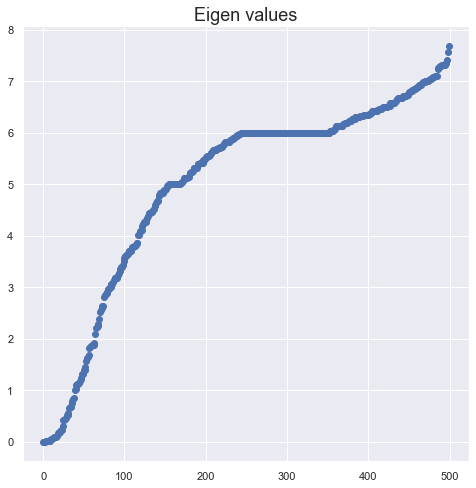

In [8]:
fig , ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(np.arange(0,len(vals_sorted)),abs(vals_sorted))
ax.set_title('Eigen values',fontsize=18);

Find the Fiedler Vector :<br>
This is the eigenvector which corresponds to the Fiedler Value (= the second eigenvalue)

Create an array with for every point in the cloud of 500 points the corresponding loading in the `Fiedler Vector`.
This is stored in an array **U**

In [9]:
U = np.array((vecs_sorted[:,1])).reshape(-1,1)

These elements are split in two different clusters using `KMeans ++`

In [10]:
km = KMeans(init='k-means++', n_clusters=2,random_state=0)
km.fit(U);

With this knowledge we can assign each of the points to these clusters

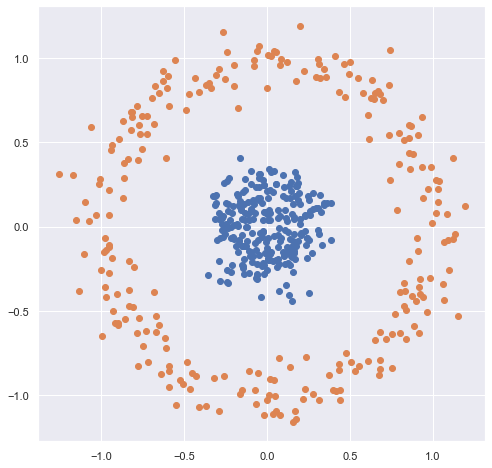

In [11]:
fig,ax = plt.subplots(1,1,figsize=(8,8))

plt.scatter(X[km.labels_==0,0],X[km.labels_==0,1])
plt.scatter(X[km.labels_==1,0],X[km.labels_==1,1]);